#  LabTest: ML model deployment



ปรับแต่งโค้ดที่ให้มาเพื่อสร้างโมเดล และ Deploy บน Streamlit


 ส่ง
- LabTest-xxx.ipynb
- model_penguin_xxx.pkl
- app_predict_penguin_XXX.py
- LabTest-xxx.pdf


## Import Packages

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd/content/drive/MyDrive/Labtest698

/content/drive/MyDrive/Labtest698


In [3]:
ls

LabTest-938.ipynb  penguins_size.csv


In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

import pickle


## Prepare Data

In [5]:
df_org = pd.read_csv("penguins_size.csv")
df_org.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


## Handle Missing Data

In [6]:
df_org.isna().sum()/len(df_org)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.581395
culmen_depth_mm,0.581395
flipper_length_mm,0.581395
body_mass_g,0.581395
sex,2.906977


In [8]:
df = df_org.dropna(subset = ['culmen_length_mm', 'culmen_depth_mm','flipper_length_mm', 'body_mass_g'])
df['sex'] = df_org['sex'].fillna(df['sex'].mode()[0])
df['sex'] = df_org['sex'].replace(to_replace='.', value = df['sex'].mode()[0])

<ipython-input-8-365ce1184180>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df_org['sex'].fillna(df['sex'].mode()[0])
<ipython-input-8-365ce1184180>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'] = df_org['sex'].replace(to_replace='.', value = df['sex'].mode()[0])


In [9]:
df.isna().sum()/len(df)*100

,0
species,0.000000
island,0.000000
culmen_length_mm,0.000000
culmen_depth_mm,0.000000
flipper_length_mm,0.000000
body_mass_g,0.000000
sex,2.339181


## Categotical Encoding

In [10]:
df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
df['species'].unique()
# df['island'].unique()
# df['sex'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [12]:
#Encoding the object columns.
from sklearn.preprocessing import LabelEncoder

# species_encoder = LabelEncoder().fit(['Adelie', 'Chinstrap', 'Gentoo'])
species_encoder = LabelEncoder().fit(df['species'])

# island_encoder = LabelEncoder().fit(['Torgersen', 'Biscoe', 'Dream'])
island_encoder = LabelEncoder().fit(df['island'])

# sex_encoder = LabelEncoder().fit(['MALE', 'FEMALE'])
sex_encoder = LabelEncoder().fit(df['sex'])


In [13]:
species_encoder.classes_

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

## Train/Test Data Split

In [14]:
X = df.drop('species', axis=1)
y = df['species']

In [47]:
# Split data into features and target
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Trining / Create Model using XXX Alg

In [49]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder  # Import OneHotEncoder
from sklearn.compose import ColumnTransformer # Import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier

In [35]:
# # Define the pipeline
# model = Pipeline(steps=[
#     ('scaler', StandardScaler()),  # Normalization step
#     ('rf', RandomForestClassifier(random_state=42))  # You can replace this with any other classifier
# ])

# Assuming 'island', 'sex' are the categorical features
categorical_features = ['island', 'sex']  # Include 'sex' as a categorical feature
numerical_features = df.drop(['species', 'island', 'sex'], axis=1).columns # Exclude 'sex' from numerical features

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore')) # Handle unknown categories during prediction
])

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Update the pipeline with the preprocessor
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(random_state=42))
])

param_grid = {
    'rf__n_estimators': [10, 100, 1000],
    'rf__max_depth': [None, 10, 20],
}


# Create GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')  # You can adjust cv (cross-validation) as needed

# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

In [37]:
print(best_params)
print(best_estimator)

{'rf__max_depth': None, 'rf__n_estimators': 100}
Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['island', 'sex'])])),
                ('rf', RandomForestClassifier(random_state=42))])


## Testing / Evaluation

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
# # Make predictions
# y_pred = model.predict(X_test)
# Fit the pipeline with GridSearchCV
grid_search.fit(X_train, y_train)

# Access the best parameters and best estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

# Use the best estimator for prediction
y_pred = best_estimator.predict(X_test)


summary_eval = classification_report(y_test,y_pred,digits=4)
print(summary_eval)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=species_encoder.inverse_transform(model.named_steps['rf'].classes_), # Changed 'RandomForestClassifier' to 'rf'
            yticklabels=species_encoder.inverse_transform(model.named_steps['rf'].classes_)) # Changed 'classifier' to 'rf'
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')



# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_knn.png')

plt.show()

              precision    recall  f1-score   support

      Adelie     1.0000    0.9714    0.9855        35
   Chinstrap     0.9231    1.0000    0.9600        12
      Gentoo     1.0000    1.0000    1.0000        22

    accuracy                         0.9855        69
   macro avg     0.9744    0.9905    0.9818        69
weighted avg     0.9866    0.9855    0.9857        69



AttributeError: 'RandomForestClassifier' object has no attribute 'classes_'

<Figure size 600x400 with 0 Axes>

In [51]:
# from sklearn.metrics import confusion_matrix, classification_report
# import matplotlib.pyplot as plt
# import seaborn as sns


# # Make predictions
# y_pred = model.predict(X_test)

# summary_eval = classification_report(y_test,y_pred,digits=4)
# print(summary_eval)

# # Calculate the confusion matrix
# cm = confusion_matrix(y_test, y_pred)

# # Plot the confusion matrix using seaborn heatmap
# plt.figure(figsize=(6, 4))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
# plt.title('Confusion Matrix: Random Forest')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# # Save the plot as an image file (e.g., PNG)
# plt.savefig('confusion_matrix_randforest.png')

# plt.show()

ValueError: could not convert string to float: 'Biscoe'

In [53]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Assuming 'island' and 'sex' are your categorical features:
categorical_features = ['island', 'sex']

# Define the transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'  # Keep other columns as they are
)

# Fit and transform training data
X_train_encoded = preprocessor.fit_transform(X_train)
X_test_encoded = preprocessor.transform(X_test)

# Train the model and make predictions
model.fit(X_train_encoded, y_train)
y_pred = model.predict(X_test_encoded)

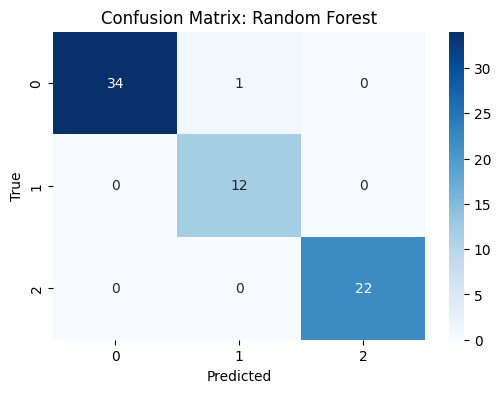

In [56]:
# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', )
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted')
plt.ylabel('True')
# Save the plot as an image file (e.g., PNG)
plt.savefig('confusion_matrix_randforest.png')

plt.show()

## Save Model and etc.

In [58]:
# Create a tuple or any container object with your variables
data_to_save = (model, species_encoder, island_encoder ,sex_encoder)

# Open a file in binary write mode
with open('model_penguin_65130701938.pkl', 'wb') as file:
    # Save the container object
    pickle.dump(data_to_save, file)

## Load Model and Prediction

Kernel -> Restart Kernel..

In [59]:
import pickle
import pandas as pd

In [ ]:

# with open('knn_penguin.pkl', 'rb') as file:
#     # Load the data from the file
#     model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)

In [60]:
with open('model_penguin_65130701938.pkl', 'rb') as file:
    # Load the data from the file
    model, species_encoder, island_encoder ,sex_encoder = pickle.load(file)



### New data

In [61]:
x_new =  pd.DataFrame()
x_new['island'] = ['Torgersen']
x_new['culmen_length_mm'] = [37.0]
x_new['culmen_depth_mm'] = [19.3]
x_new['flipper_length_mm'] = [192.3]
x_new['body_mass_g'] = [3750]
x_new['sex'] = ['MALE']


### Categorical Data Encoding

In [62]:
x_new['island'] = island_encoder.transform(x_new['island'])
x_new['sex'] = sex_encoder.transform(x_new['sex'])


In [63]:
x_new

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,37.0,19.3,192.3,3750,1


### Predicting

In [66]:
!pip install scikit-learn --upgrade

In [67]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [77]:
# Get feature names from X_train directly
feature_names = X_train.columns  # Use the columns from the training data

# Ensure x_new has the same columns and in the same order, and fill missing values with 0
x_new = x_new.reindex(columns=feature_names, fill_value=0)


In [96]:


# Display all feature names as seen by the scaler within the pipeline
try:
    feature_names = model['scaler'].get_feature_names_out()
except AttributeError:
    feature_names = model['scaler'].feature_names_in_

print("Feature names expected by scaler:", feature_names)



Feature names expected by scaler: ['x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x8' 'x9']


In [97]:
# y_pred_new = model.predict(x_new)

# result = species_encoder.inverse_transform(y_pred_new)

# print('Predicted Specie: ', result)

### Create app_predict_knn_penguin.py for Running with streamlit

https://docs.streamlit.io/library/api-reference

streamlit run app_predict_knn_penguin.py

In [99]:
%%writefile app_predict_penguin_65130701938.py

import streamlit as st
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
import pickle

# Load the model and encoders
with open('model_penguin_65130701938.pkl', 'rb') as file:
    model, species_encoder, island_encoder, sex_encoder = pickle.load(file)

# Load your DataFrame
# Replace 'your_data.csv' with the actual file name or URL
df = pd.read_csv('penguins_size.csv')
df = df.drop('species', axis=1)

# Streamlit App
st.title('Penguin Species Prediction')

# # Define a session state to remember tab selections
# if 'tab_selected' not in st.session_state:
#     st.session_state.tab_selected = 0

# # Create tabs for prediction and visualization
# tabs = ['Predict KPIs', 'Visualize Data', 'Predict from CSV']
# selected_tab = st.radio('Select Tab:', tabs, index=st.session_state.tab_selected)

# # Tab selection logic
# if selected_tab != st.session_state.tab_selected:
#     st.session_state.tab_selected = tabs.index(selected_tab)

# # Tab 1: Predict KPIs
# if st.session_state.tab_selected == 0:
#     st.header('Predict KPIs')

    # User Input Form
    st.header('Enter Penguin Characteristics:')
    island = st.selectbox('Island', island_encoder.classes_)
    culmen_length_mm = st.number_input('Culmen Length (mm)', min_value=0.0)
    culmen_depth_mm = st.number_input('Culmen Depth (mm)', min_value=0.0)
    flipper_length_mm = st.number_input('Flipper Length (mm)', min_value=0.0)
    body_mass_g = st.number_input('Body Mass (g)', min_value=0.0)
    sex = st.selectbox('Sex', sex_encoder.classes_)

    # Create a DataFrame for the user input
    user_input = pd.DataFrame({
    'island': [island],
    'culmen_length_mm': [culmen_length_mm],
    'culmen_depth_mm': [culmen_depth_mm],
    'flipper_length_mm': [flipper_length_mm],
    'body_mass_g': [body_mass_g],
    'sex': [sex]
  })

   # Categorical Data Encoding
    user_input['island'] = island_encoder.transform(user_input['island'])
    user_input['sex'] = sex_encoder.transform(user_input['sex'])

    # Predicting
    if st.button('Predict'):
      try:
          prediction = model.predict(user_input)
          predicted_species = species_encoder.inverse_transform(prediction)[0]
          st.success(f'Predicted Species: **{predicted_species}**')
      except Exception as e:
          st.error(f"Prediction failed: {e}")

    # Display Result
    st.subheader('Prediction Result:')
    st.write('KPIs_met_more_than_80:', prediction[0])






Overwriting app_predict_penguin_65130701938.py


## Deploy on Streamlit Sharing

https://share.streamlit.io/

https://github.com/



In [100]:
%%writefile requirements.txt

scikit-learn
pandas


Writing requirements.txt
